# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [191]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [192]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [193]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


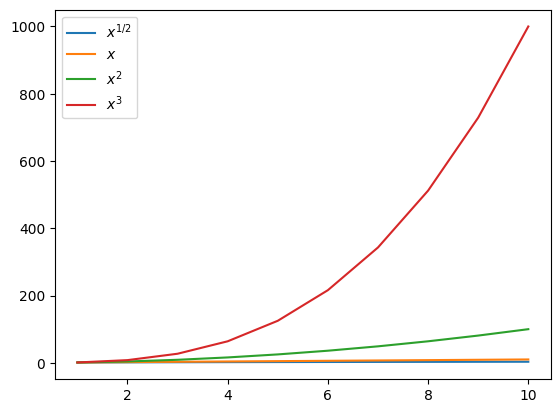

In [194]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

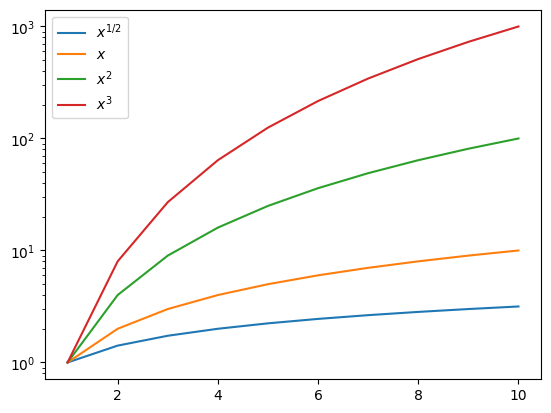

In [195]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


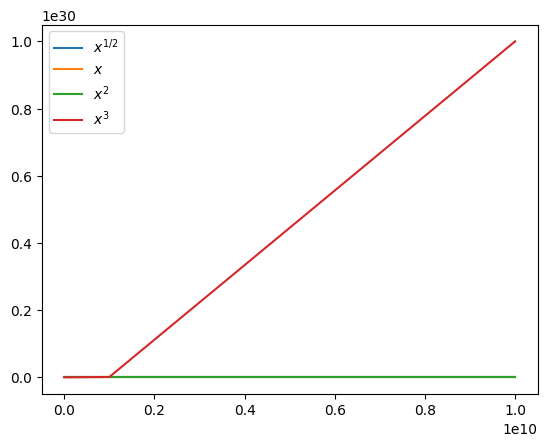

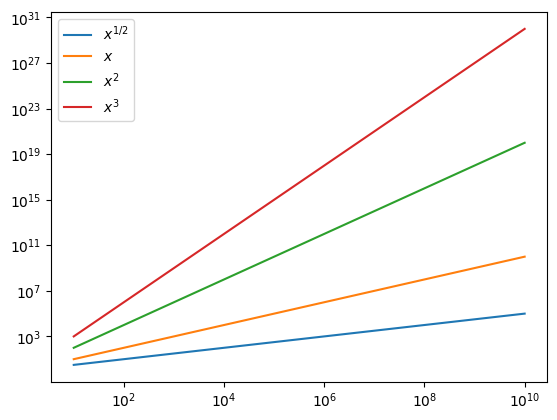

In [196]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [197]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [198]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

In [199]:
# your code here

Write your answer, using $\LaTeX$, in this box.

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

In [200]:
# your code here

Write your answer, using $\LaTeX$, in this box.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Write your answer, using $\LaTeX$, in this box.

The stopping criterion should be such that when the term is below the machine precision, the summation stops as at that point the accuracy of the aproximation will only decrease.




In [201]:
machine_precision = sys.float_info.epsilon
machine_precision

2.220446049250313e-16

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [202]:

def aprox_natural_order(x):
    '''Approximate the exponential function using the first n terms of the Taylor series.'''
    machine_precision = sys.float_info.epsilon
    answer = 1
    delta = 0
    while delta > machine_precision:
        delta = x**i / factorial(i)
        answer += delta
        if np.abs(delta) < machine_precision:
            print("Machine precision limit reached at iteration i = ", i)
            break
        return answer
    return answer


In [203]:
# generate a list of x values to test
xs = [-20,-15,-10,-5,-1,1,5,10,15,20]

# setting parameters:
n_terms = 10000

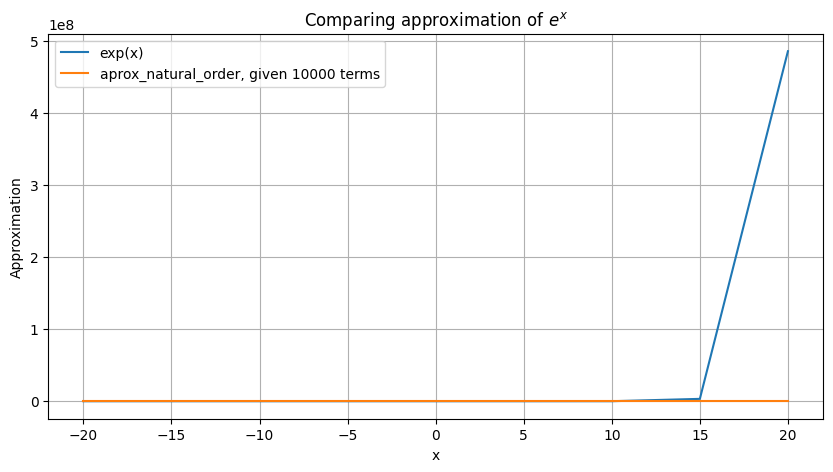

In [204]:
# plotting results
plt.figure(figsize=(10, 5))
plt.title("Comparing approximation of $e^x$")
plt.xlabel("x")
plt.ylabel("Approximation")
plt.grid()
plt.plot(xs, [exp(x) for x in xs], label="exp(x)")
plt.plot(xs, [aprox_natural_order(x) for x in xs], label=f"aprox_natural_order, given {n_terms} terms")
plt.legend()
plt.show()

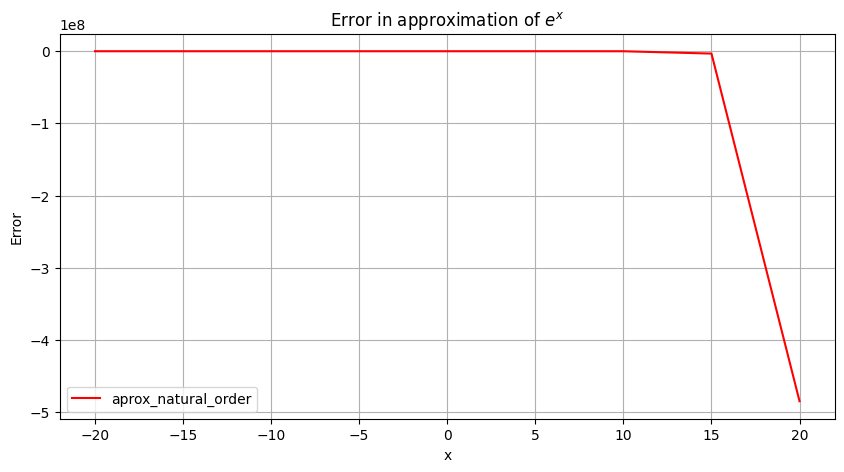

In [205]:
# plot the error
error = [aprox_natural_order(x) - exp(x) for x in xs]
plt.figure(figsize=(10, 5))
plt.title("Error in approximation of $e^x$")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid()
plt.plot(xs, error, label=f"aprox_natural_order", c="red")
plt.legend()
plt.show()


The series is not well approximated at x = 20, don't know why, maybe over or underflow error of numerator or denominator?

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Does not seem to be needed as aproximation seems to hold for x < 0, using the x values tested. But lets test for other x values:

C:\Users\nitai\AppData\Local\Temp\ipykernel_25152\3343163240.py:11: RuntimeWarning: overflow encountered in exp
  plt.plot(test_data, [np.exp(x) for x in test_data], label="exp(x)")


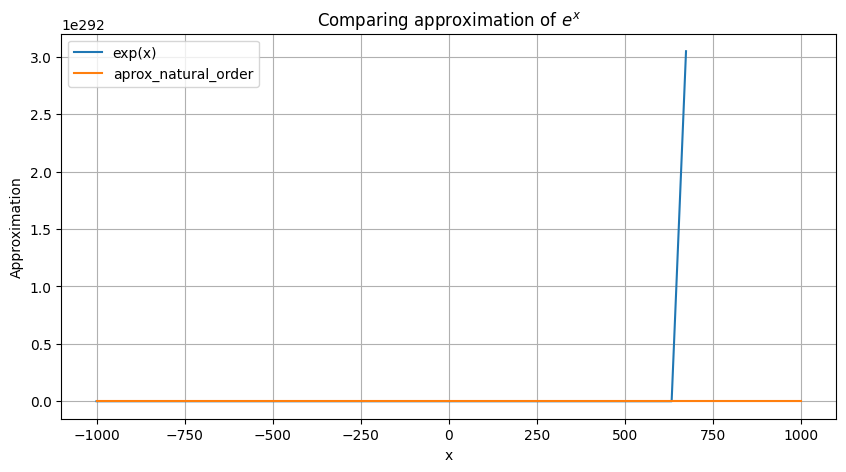

In [206]:
# Creating test data
test_data = np.linspace(-1000, 1000)


# testing aprox_natural_order & plotting results
plt.figure(figsize=(10, 5))
plt.title("Comparing approximation of $e^x$")
plt.xlabel("x")
plt.ylabel("Approximation")
plt.grid()
plt.plot(test_data, [np.exp(x) for x in test_data], label="exp(x)")
plt.plot(test_data, [aprox_natural_order(x) for x in test_data], label=f"aprox_natural_order")
plt.legend()
plt.show()

Overflow error in numpy implementation is surprising..

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

Do not know how we would do that